In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv(r'C:\Users\swalp\OneDrive\Desktop\Data Analyst\DATA SCIENCE\new Assignment\Logistic Regression assignment\Titanic_train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# we can drop cabin column as it has more than 60% null values..
data_train.drop(["Cabin"],axis=1, inplace=True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
# next i am imputing Embarked column with mode value as its categorical column.
mode_embarked = data_train['Embarked'].mode()[0]
mode_embarked 

'S'

In [7]:
data_train['Embarked'].fillna('S',inplace=True)
data_train .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
# now i will calculate the mean of age column and then will impute this mean value to the place of Null values as its numeric column.
mean_age =data_train['Age'].mean()
mean_age

29.69911764705882

In [9]:
data_train.fillna({'Age':data_train['Age'].mean()},inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
# i filled all the null values  by respective appropriate values. so now no null values in data.

In [11]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [12]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualization

In [14]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:

# droppin Name and Ticket column as it has not much relevance
data_train = data_train.drop(['Name','Ticket'], axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
data_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

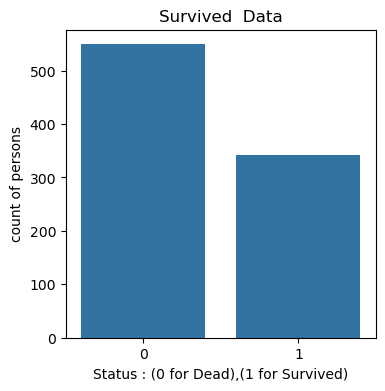

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',data=data_train)
plt.xlabel('Status : (0 for Dead),(1 for Survived)')
plt.ylabel('count of persons')
plt.title('Survived  Data')
plt.show()

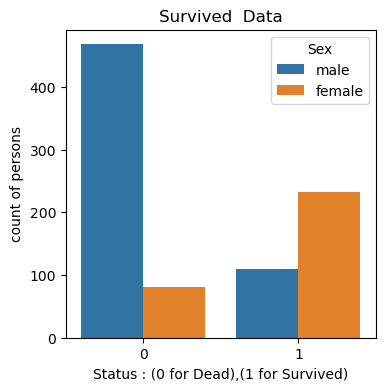

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',hue='Sex',data=data_train)
plt.xlabel('Status : (0 for Dead),(1 for Survived)')
plt.ylabel('count of persons')
plt.title('Survived  Data')
plt.show()

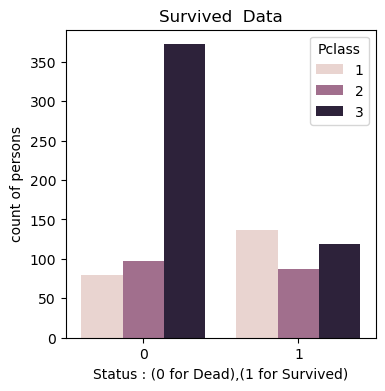

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',hue='Pclass',data=data_train)
plt.xlabel('Status : (0 for Dead),(1 for Survived)')
plt.ylabel('count of persons')
plt.title('Survived  Data')
plt.show()

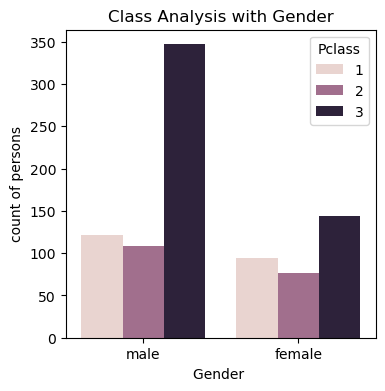

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex',hue='Pclass',data=data_train)
plt.xlabel('Gender ')
plt.ylabel('count of persons')
plt.title('Class Analysis with Gender')
plt.show()

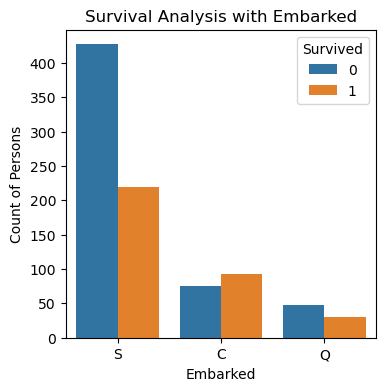

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='Embarked',hue='Survived',data=data_train)
plt.xlabel('Embarked')
plt.ylabel('Count of Persons')
plt.title('Survival Analysis with Embarked')
plt.show()

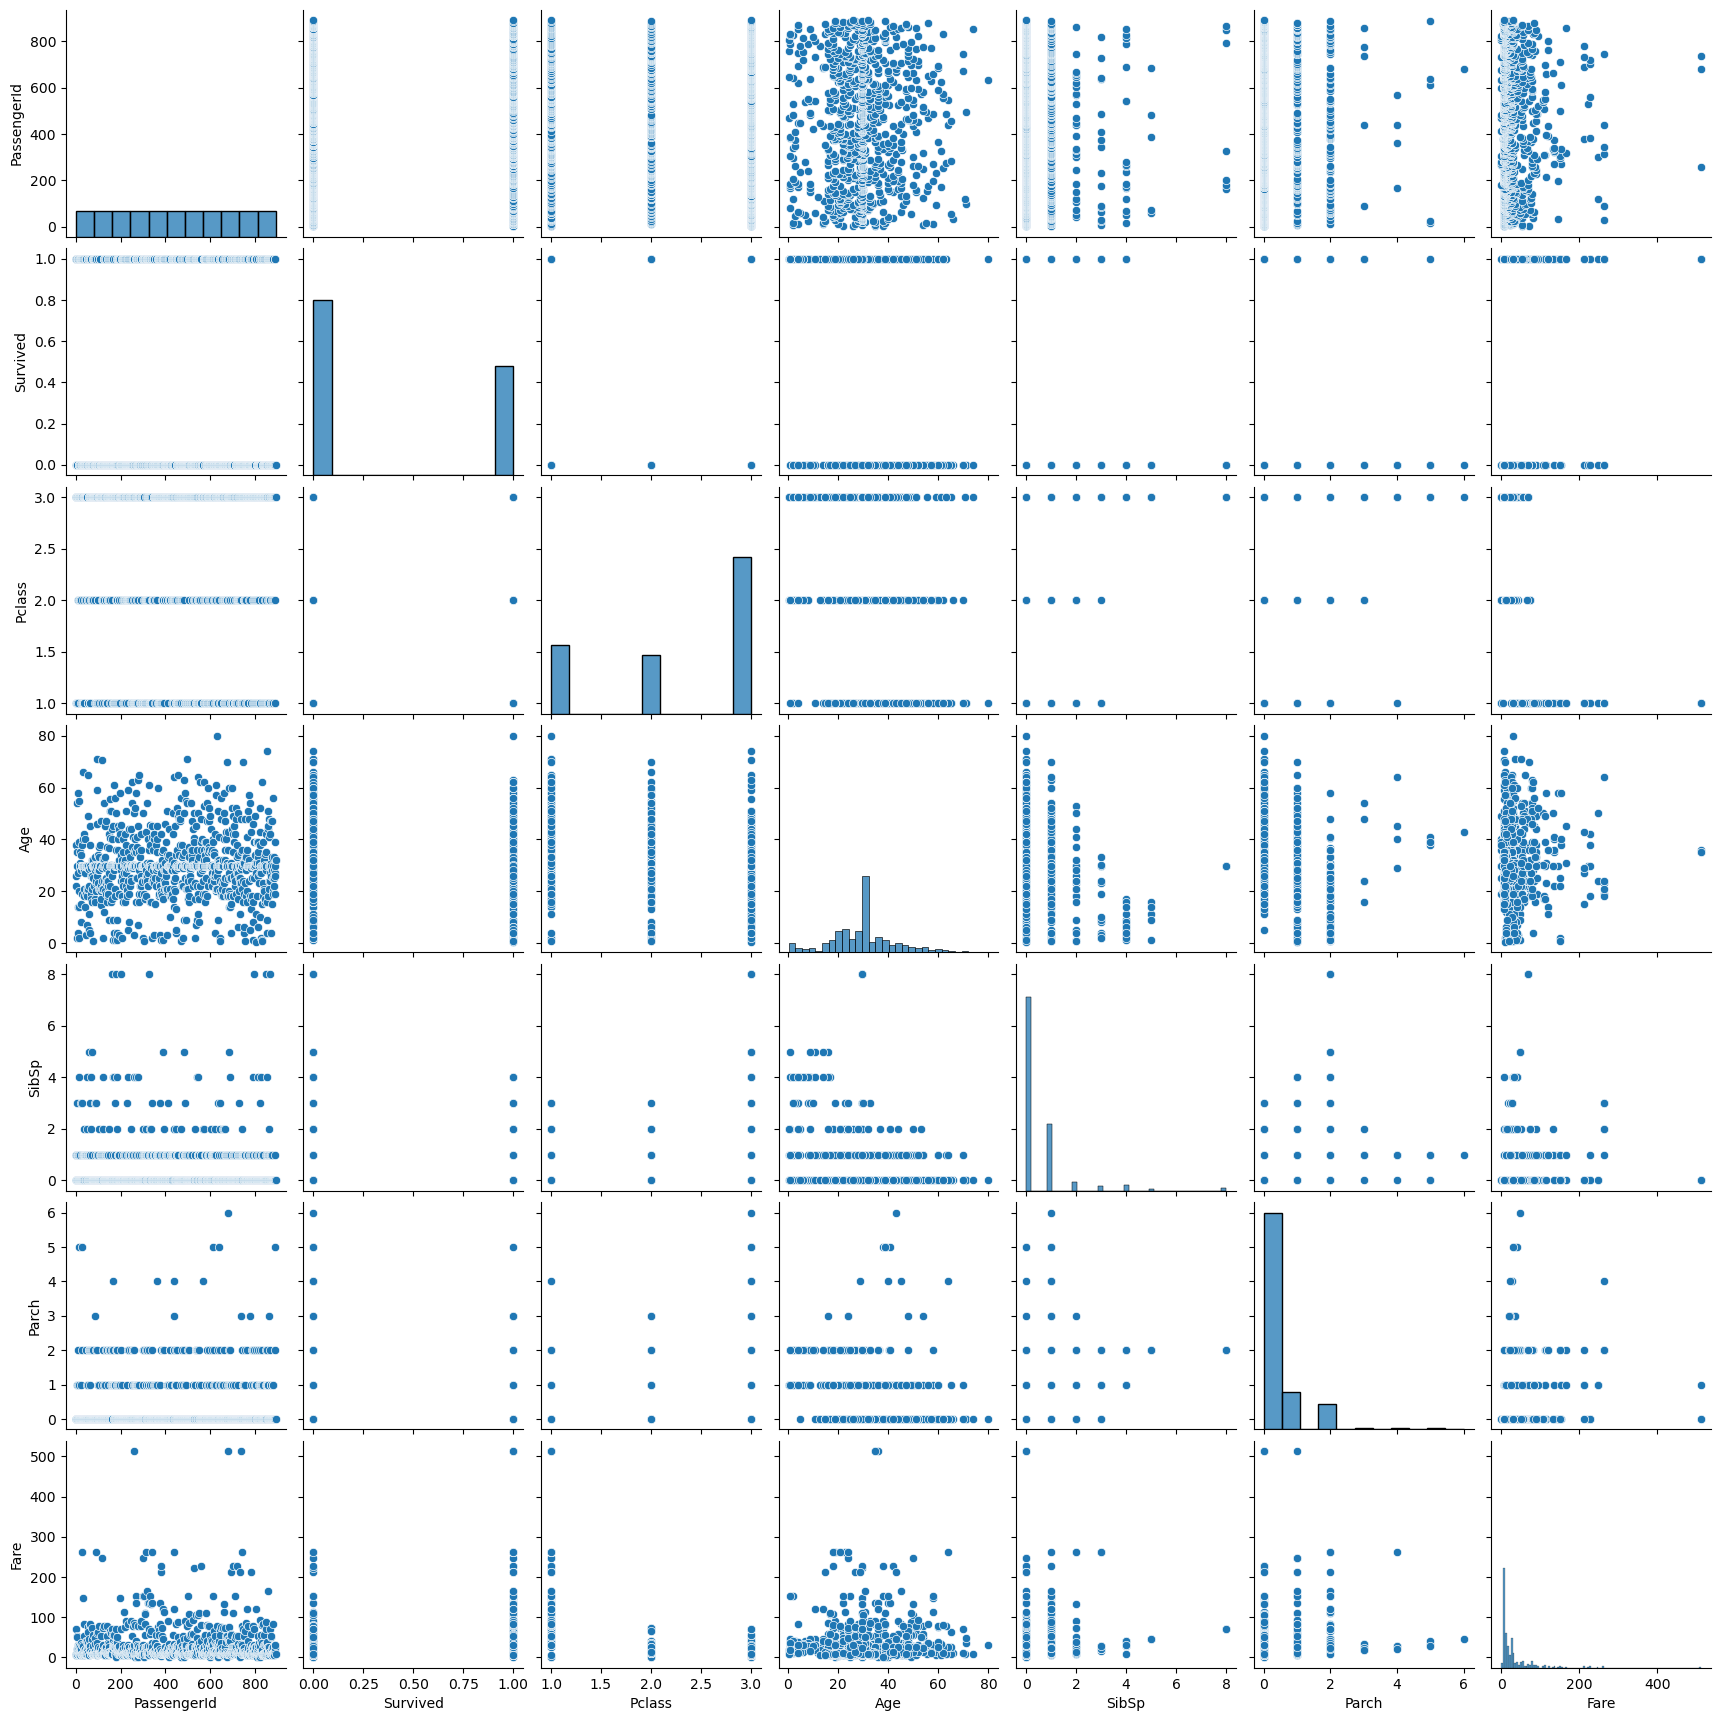

In [22]:

# plt.figure(figsize =(10,10))
sns.pairplot(data_train)
#plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
le=LabelEncoder()

In [25]:
data_train['Embarked'] =le.fit_transform(data_train['Embarked'])

In [26]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  # to see what categorical value is given what numeric column
print(label_mapping)

{'C': 0, 'Q': 1, 'S': 2}


In [370]:
data_train['Sex'] =le.fit_transform(data_train['Sex'])
data_train

In [371]:
data_train.head() ## now data_train is ready to be processed... 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [65]:
data_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [372]:
data_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


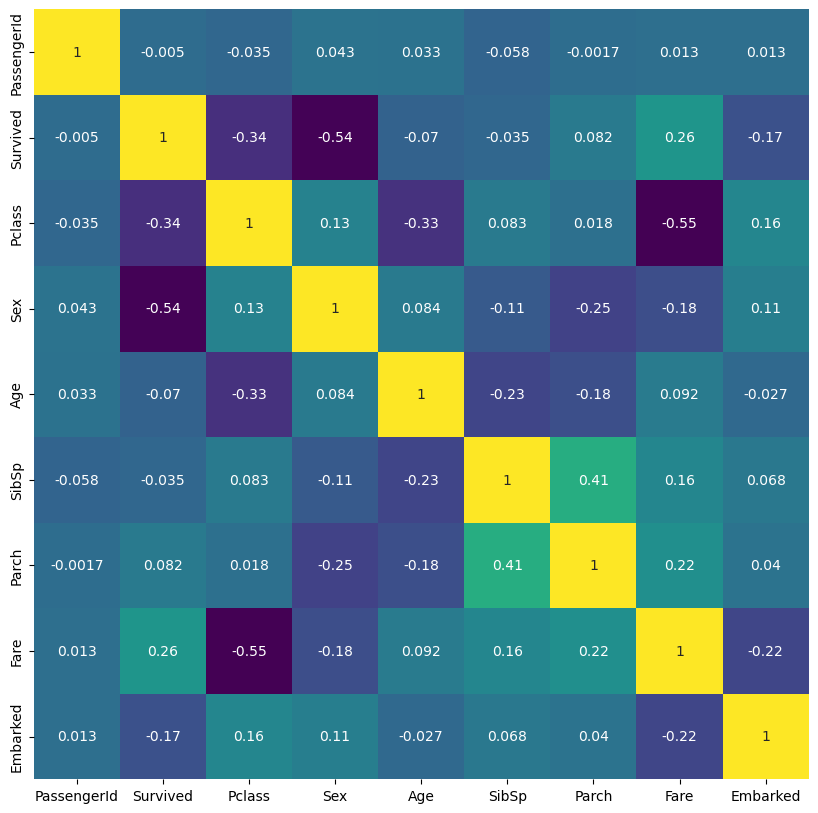

In [373]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(), annot=True, cmap='viridis',cbar=False)
plt.show()

# Creating Feature and Target---

In [374]:
X_train=data_train.drop('Survived',axis=1)
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [375]:
y_train=data_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Test Data cleaning

# Test Data Processing

In [376]:

data_test =pd.read_csv(r'C:\Users\swalp\OneDrive\Desktop\Data Analyst\DATA SCIENCE\new Assignment\Logistic Regression assignment\Titanic_test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [377]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [378]:
data_test = data_test.drop(['Name','Ticket','Cabin'], axis=1)
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [379]:
# Imputing Null values with mean value in 'Age' Column
mean_age =data_test['Age'].mean()
mean_age

30.272590361445783

In [380]:
data_test.fillna({'Age':data_test['Age'].mean()},inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [381]:
data_test.dropna(subset=['Fare'], inplace=True)

In [382]:
data_test.shape

(417, 8)

# Encoding datatest--

In [383]:
data_test['Sex'] =le.fit_transform(data_test['Sex'])

In [384]:
data_test['Embarked'] =le.fit_transform(data_test['Embarked'])

In [324]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,1
1,893,3,female,47.00000,1,0,7.0000,2
2,894,2,male,62.00000,0,0,9.6875,1
3,895,3,male,27.00000,0,0,8.6625,2
4,896,3,female,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,2
414,1306,1,female,39.00000,0,0,108.9000,0
415,1307,3,male,38.50000,0,0,7.2500,2
416,1308,3,male,30.27259,0,0,8.0500,2


# Creating feature and target 

In [385]:
X_test= data_test
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [329]:
# y_test =data_test['Survived']


### Building Model

In [331]:
from sklearn.linear_model import LogisticRegression 

In [332]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## test the model  on training data

In [333]:
from sklearn.metrics import confusion_matrix, classification_report

In [334]:
yhat_train=model.predict(X_train)

In [335]:
cm=confusion_matrix(y_train,yhat_train)
cm

array([[476,  73],
       [115, 227]], dtype=int64)

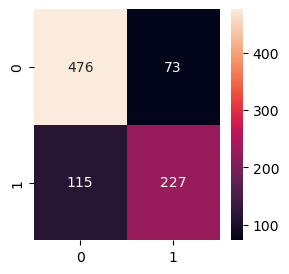

In [336]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [337]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.76      0.66      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



## AUC ROC curve for training data

In [340]:
from sklearn.metrics import roc_curve, roc_auc_score

In [341]:
def plot_roc(y,yhat):
    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y_train, yhat_train)
 
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()


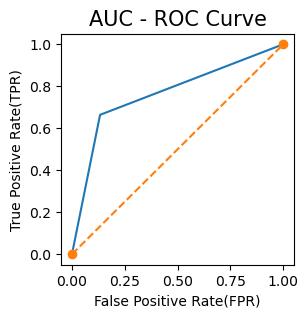

In [342]:
plot_roc(y_train,yhat_train)

# Coefficients and Intercept of the model

In [395]:
coefficients = model.coef_[0]
coefficients

array([ 1.05699269e-03, -3.23369827e-01, -2.48947701e+00, -1.05601623e-02,
       -1.04319939e-01, -3.59581937e-01,  1.30160022e-02, -2.71711742e-02])

In [396]:
intercept = model.intercept_[0]
intercept

1.3276669556582388

In [343]:
## test the model on testing data

In [389]:
yhat_test=model.predict(X_test)
yhat_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [392]:
data_test['Survived'] =pd.DataFrame(yhat_test)
data_test['Survived']

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
413    1.0
414    0.0
415    0.0
416    0.0
417    NaN
Name: Survived, Length: 417, dtype: float64

 # I can not Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score beacuse in test data there is no 'Survived' Column. so cant compare y_test and yhat_test. But i did this evaluation  for training data along with AUC ROC Curve.